# Probability Plots

In this lecture, we'll be using another case study to help us learn about probability plots. In particular,
we'll be focusing on something called a Quantile-Quantile plot (QQ plot), which is a graphical technique
that allows us to see whether a particular data set follows a given distribution. We'll also discuss how to
use a statistical test to make quantitative determinations as to whether or not a sample is indeed drawn
from a particular distribution.

Now, one of the benefits of learning data science from a large public research university like the
University of Michigan is that we're able not just to share with you different techniques and approaches,
but to ground those techniques in our own work. As you might know, my research is in an area broadly known
as _learning analytics_, which is the study of learning, teaching, and education through data and analytics
processes. So in this lecture I'm going to share some of our own work and how we applied visual exploration
and statistical methods to understand and evaluate educational predictive models.

## Motivation: Educational Predictive Models

<img src="Student_Explorer_Info.png" alt="Student Explorer" style="width: 500px;"/>

One area of current are of interest in education involves developing predictive models for use in early
warning systems. So, for instance, we may want to predict how a student might perform in a class and
identify those who may be at risk for dropping out of a course. The hope is to use this information in order
to stage an appropriate intervention and provide that student with the necessary support and resources to
succeed. At the University of Michigan we actually have one of these systems called *Student Explorer*,
which was created by a colleague of mine, Stephanie Teasley, who is faculty here in the School of
Information. You can see from the diagram above that it uses a number of different features about the
student grade, the course average, and the site page views to classify the student into one of three
categories, and it uses a sort of red yellow green signal light metaphor when communicating this to advisors
depending upon the risk category the student is in.

Many of these early warning systems use private and sensitive student data such as your grades,
demographics, online activity logs, and other details. As a result, there are have concerns about how this
data is being used and the potential implications, including:

* personal privacy concerns 
* legislative oversight 
* and risks and inequities

While universities have many protocols, procedures, and structure to keep your data safe and secure,
numerous news stories on data breaches certainly do not instill confidence in people regarding how their
data is being managed. For education specifically, there are also pieces of legislation, such as FERPA,
which restricts how personal identifying information is to be used and shared.

And so this brings you to the research issue I've been studying, with my PhD student Warren Li and
collaborator Florian Schuab who is faculty here in the School of Information. Specifically, if students
explicitly opt-out of having their data shared for these purposes, how would that affect the quality of
predictive models we were able to build? Would it add bias to the models across groups like differnt ethnic
groups or students in different years in their programs? Would the models degrade to the point where they
are no longer usable and, how fast would this degradation happen?

So, we started to explore this, and collected data on how students would opt out, and how it might affect
the quality of predictive models

## Analyzing Grade Predictions from a Model

In [1]:
# I can't share the original data, and so we won't implement the machine learning model here. Instead I've
# have provided a select subgroup of grades and predictions from our model which I'll use to demonstrate our
# analysis approach. Let's load that into a DataFrame.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
original_df = pd.read_pickle("./mads_data_pre.pkl")

# We're also going to define two constant lists: one for the valid letter grades, and another for their
# corresponding grade points. These will be used later on.
VALID_GRADES = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
NUMERIC_GRADES = [4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]

# Now let's look at the DataFrame
original_df.head()

,Actual,Predicted
0,B+,B
1,A,A
2,B+,B
3,B+,A
4,A-,A


In [14]:
# Now, we need a way to organize this information and get a visual sense of what our model is doing. To do so,
# let's plot the actual grades student's received against the predicted grades. So for example, how many times
# did our model predict an A grade when the student actually received an A, versus a B, and so forth?

# To do this, I'm going to build something called a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False):
    
    cm = np.float_(cm)
    # if the normalize flag is set then we'll just change the data values through scaling
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
    # now, the plot I'm going to show is actually just called imshow, and it's used to show images, or pixel
    # data. this is basically what will be passed in by cm, since it's a square matrix. So we're essentially
    # rendering a bunch of pixels to the screen, a grid of values
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()    
    # notice that I've set the cmap. This is the color map we want to use to show values, and you can read
    # about it in the docs. My PhD student Warren particularly likes blues, so this is why we're using these
    # values

    # Now let's set a title and some axes grades
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # And lets update the X and Y tick_marks. We expect these to be the grades which are passed in
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

In [15]:
# Ok, we have the mechanis of plotting a square matrix of values down now. This will come in handy, not just
# here but any time you are interested in looking at a confusion matrix, which is essentially a square
# matrix of your actual values versus predicted values. This helps you identify where error might lie in your
# model

# Speaking of, let's create that matrix. We have a dataframe of results, but we want to now aggregate that
# into a list of true grades versus predicted grades. The library sklearn, which you'll use in the machine
# learning course, has a nice function to create this kind of matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(original_df['Actual'], original_df['Predicted'])

array([[54062,  2972,  6218,   793,     0,   527,    24,     0,     0,
            0,     0,     0],
       [25494,  2808,  5881,   467,     0,   764,    20,     0,     0,
            0,     0,     0],
       [ 9889,  2860,  6991,   545,     0,  1445,   111,     0,     0,
            0,     0,     0],
       [15387,  2702,  6210,   915,     0,  1030,    31,     0,     0,
            0,     0,     0],
       [ 3753,  1642,  4330,   172,     0,  1269,   109,     0,     0,
            0,     0,     0],
       [  972,   894,  2207,    18,     0,  1338,   128,     0,     0,
            0,     0,     0],
       [ 1426,   912,  2429,    27,     0,  1150,   123,     0,     0,
            0,     0,     0],
       [  352,   452,   971,     9,     0,   676,    75,     0,     0,
            0,     0,     0],
       [  116,   182,   408,     0,     0,   331,    56,     0,     0,
            0,     0,     0],
       [  100,   166,   325,     1,     0,   280,    36,     0,     0,
            0,     0

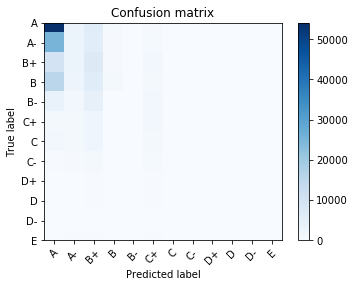

In [16]:
# Ok, that's interesting! We see big numbers in some places and small numbers in other places. It's not
# super meaningful to us yet, so let's use our plotting function
plot_confusion_matrix(cm, VALID_GRADES)

In [23]:
# Notice that regardless of the number of true labels, we almost always predict that a student will receive
# either an A- or an A! What's with that? Let's take a look at the frequencies of our data
original_df.groupby('Actual').apply(len)

Actual
A     64596
A-    35434
B     21841
B+    26275
B-    11275
C      5557
C+     6067
C-     2535
D      1093
D+      908
D-      375
E      1256
dtype: int64

In [ ]:
# Ok, so we see that in this dataset there are way more "A grade" predictions (over 100,000!) when compared to
# any other grade. Why is that?

## Visualizing Distributions: Quantile-Quantile Plots

To try and figure out why this is happening, let's try running some **diagnostics**, and try to get a better
understanding regarding our underlying data. Specifically, we're going to make a QQ plot, which stands for
Quantile-Qunatile plot.

Now, from the boxplots and violinplots discussion you should be familiar with Quartiles, which are points
that separate out 25% (or one quarter) of the data. Quantiles (also known as percentiles) are just a
generalization of this idea. So the 0.5 quantile would be the 50th percentile, and so half of the data would
lie below/above this point.

To create a QQ plot we will:
1. To order our n data points in ascending order (we're making each point it's own quantile)
2. To evenly divide a normal distribution into n+1 segments (each with equal area) 
3. To compute the z-values for each of these "cut-off" points (theoretical quantiles)
4. To plot the actual quantiles against the theoretical quantiles

Now, the open textbook I've shared has a discussion of this under the term Quantile-Normal plot, since they
are specifically interested in checking whether a given set of data is normally distributed or not, and they
call these QN plots. You can find this on page 83, and here's a link to that textbook again:
https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf

In addition to this though, there are a couple of demonstrations of what quantiles and percentiles are which
you can review here https://www.youtube.com/watch?v=IFKQLDmRK0Y

One more resource is this nice video on QQ plots, which you might find helpful
https://www.youtube.com/watch?v=okjYjClSjOg

But what I want to get on to show you is the code that we used to actually build this plot for our data.

<BarContainer object of 12 artists>

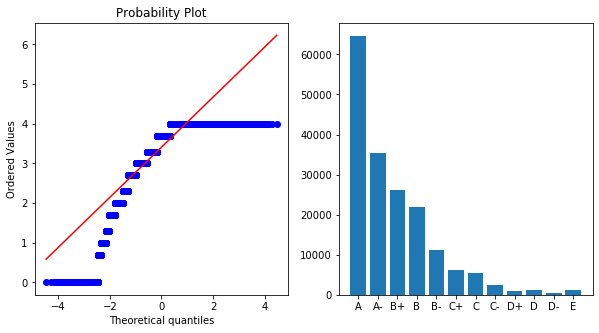

In [24]:
#You won't need to manually go through this process. Instead, we'll be using the probability plot 
#function from the scipy.stats library. 

import scipy.stats as stats
grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))
grade_dist = original_df.replace({'Actual' : grade_point_dict})['Actual']

plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

#We're going to plot two sets of data. First, let's turn our original grade distribution into a 
#numpy array. We're going to make a QQ plot, and show the corresponding bar plot as well. 

#CASE 1: Original Grade Distribution
grades = np.array(grade_dist.astype('float'))
stats.probplot(grades, dist=stats.norm, plot=ax1)
ax2.bar(VALID_GRADES, [sum([1 for x in grades if x == grade]) for grade in NUMERIC_GRADES])

#If the data are normal, then we would expect to see a line that closely follows the red diagonal. 
#However, this is clearly not the case; notice that we assign way more "A's" than any other grade!
#As a result, the distribution is skewed right. To demonstrate what happens if we do have something
#that looks more bell-curve shaped, let's uncomment the portion below and see what happens if we
#artificially come up with a grade distribution. Notice that most of the dots do fall along the diagonal.

#CASE 2: Artificial 'Curved' Grade Distribution
# curved = [4.0]*1 + [3.7]*2 + [3.3]*2 + [3.0]*3 + [2.7]*5 + [2.3]*7 + [2.0]*7 + [1.7]*5 + \
#          [1.3]*3 + [1.0]*2 + [0.7]*2 + [0.0]*1
# stats.probplot(curved, dist=stats.norm, plot=ax1)
# ax2.bar(VALID_GRADES, [sum([1 for x in curved if x == grade]) for grade in NUMERIC_GRADES])

So, one of the problems is that there is significantly more data for high grades, and so our model is unable to predict other types of grades reliably. In other words, if we just predicted that everyone would get an 'A', we'd have a pretty good accuracy already! Even though that wouldn't make for a very useful predictive model. To combat this, we can try to balance out our dataset and try undersampling, as shown below:

![undersampling](undersampling.png)

So, since there are only 3 F's, we'll just take a random sample of 3 A's, B's, and C's and ignore the rest. In the actual study, we oversampled by generating synthetic points. But to keep things simple for now, we'll stick with undersampling.

[7998, 4, 67369, 6301, 10668, 1666, 14337, 2975, 7148, 45799, 3258, 9689]


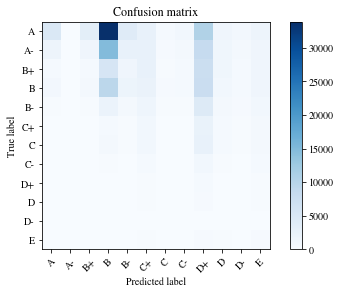

In [82]:
#After implementing this change and rerunning the models, we get a new set of prediction, which we'll
#read into another dataframe. 
processed_df = pd.read_pickle("./mads_data_post.pkl")

from sklearn.metrics import confusion_matrix
true_g = [grade for grade in processed_df['Actual']]
pred_g = [grade for grade in processed_df['Predicted']]
print([sum([1 for x in pred_g if x == grade]) for grade in VALID_GRADES])
cm = confusion_matrix(true_g, pred_g)
plot_confusion_matrix(cm, VALID_GRADES)

#Notice that we get a much broader range of predictions now!

In [80]:
#In general, how do we interpret QQ-plots? To illustrate, we've provided a function
#that let's us plot a skewed distribution with parameters you can play with.

def randn_skew(N, skew=0.0, loc=0.0, scale=1.0):
    sigma = skew / np.sqrt(1.0 + skew**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1

(array([ 5.,  7.,  9., 15., 15., 14., 16.,  9.,  6.,  4.]),
 array([-1.88234952, -1.49321161, -1.1040737 , -0.71493578, -0.32579787,
         0.06334004,  0.45247795,  0.84161587,  1.23075378,  1.61989169,
         2.0090296 ]),
 <a list of 10 Patch objects>)

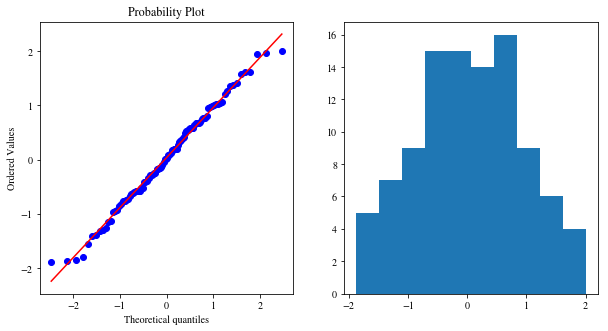

In [81]:
import scipy.stats as stats

#First, we're going to convert the letter grades into their corresponding numerical grade points.
grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))
grade_dist = original_df.replace({'Actual' : grade_point_dict})['Actual']

plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

#Now, let's try playing around with different conditions and see what the QQ plot looks like.
#Specifically, we're going to try analyzing a distribution with long tails (large SD), 
#short tails (small SD), right (positive) skew, and left (negative) skew.
#MODIFY THE PARAMETERS BELOW (number of points, skew, mean, standard deviation)
measurements = randn_skew(100, 0, 0, 1)

#CASE 3: Generated Skew-Normal Distribution
stats.probplot(measurements, dist=stats.norm, plot=ax1)
ax2.hist(measurements)

### Statistical Tests: Comparing Distributions

Now let's discuss how to compare two distributions using hypothesis testing. 

Given the null hypothesis $H_0$, that our distribution is normal, and our alternative hypothesis $H_a$, that our distribution is not normal, we can conduct a Kolmogorov-Smirnov (or KS) test to determine whether or not we should reject the null hypothesis. Similar to how we can find a z-statistic or a t-statistic, we can also calculate a KS test statistic. 

--------------------------------------------

The formal definition is given for reference, but you won't be expected to understand the details, and the material in this subbox is purely optional:

$$ D_n = \max_x | F_n(x) - F(x) | $$

where $F(x)$ is a cumulative distribution function (cdf) and $F_n(x)$ is an empirical distribution function given by 

$$ F_n(x) = \frac{1}{n} \sum_{i=1}^n I_{[-\infty, x]}(X_i)$$

and $I_{[-\infty, x]}$ is an indicator function equal to 1 if $X_i \leq x$ and 0 otherwise.

--------------------------------------------

The definition is provided for your reference in case you are interested, but you don't need to fully understand these equations. The main idea can be illustrated by this diagram below, 

|   one-sample KS test             |              two-sample KS test    |
|:--------------------------------:| :--------------------------------: |
|![one sample KS](KS_Example.png)  |  ![two sample KS](KS2_Example.png) |

For the one-sample KS test, we can see if its cdf is compareable to a distribution we're interested in, such as a normal distribution. The test statistic is calculated by considering the largest distance between these two sets, as shown in the figure. The same concept applies even if we are looking at two discrete data sets, such as what's shown in the two-sample KS test.

In [76]:
#And, perhaps as expected, we can make our lives easier and conduct this hypothesis test by using
#a pre-existing function from the scipy.stats library. 
#Let's first do a sanity check and conduct a one-sample KS test for the original grade distribution,
#as well as a generated set of values we know are normal. Pause and think about what you might expect
#to see for the test statistics and p-values.

from scipy import stats
measurements = randn_skew(100, 0, 0, 1)
D_grade, p_grade = stats.kstest(grades, 'norm', mode='asymp')
D_normal, p_normal = stats.kstest(measurements, 'norm', mode='asymp')

print('Original Grade Distribution:', D_grade, p_grade)
print('Generated Normal Distribution:', D_normal, p_normal)

#Note that values match our intuition! There is enough evidence to reject the null hypothesis 
#for the original grades, but not in the case of the generated sample.

Original Grade Distribution: 0.9424497416495455 0.0
Generated Normal Distribution: 0.05900128217101372 0.8772240988156372


In [19]:
#Now let's take a look at a case where you might want to conduct a 2-sample KS test.
#Recall that we talked about some of the risks of bias in predictive models earlier on.
#Below, we've loaded in some results which show the performance of our predictive models
#when predicting on male and female students. Each point represents a different amount
#of simulated opt-out, evenly-spaced from 0-99%. 

gender_df = pd.read_pickle('./mads_data_gender.pkl')
print(gender_df.head())

#As an aside, the actual metric used is something called Cohen's Kappa, which takes the 
#probability of agreement by chance into account. A value of 0.0 means that the the predictions
#are no better than chance, while a value of 1.0 means that we have perfect agreement (predictions).

       male    female
0  0.213443  0.236896
1  0.209455  0.230511
2  0.178433  0.187019
3  0.231013  0.249993
4  0.219908  0.233172


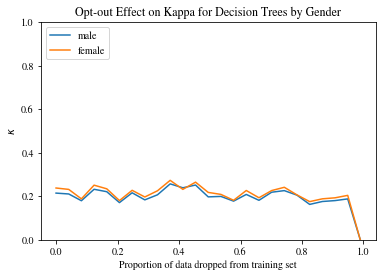

In [86]:
gender = ['Male', 'Female']
drop_percentages = np.linspace(0.00, 0.99, 25)

plt.figure()
scores_by_gender = {gender: [x for x in gender_df[gender]] for gender in gender_df.columns}
for label, y_arr in scores_by_gender.items():
    plt.plot(
        drop_percentages,
        y_arr,
        label=label
    )
plt.ylim(ymin=0, ymax=1)
plt.title('Opt-out Effect on Kappa for Decision Trees by Gender')
plt.ylabel('$\kappa$')
plt.xlabel('Proportion of data dropped from training set')
lgd = plt.legend(loc='upper left')

#We want to see whether there is actually a difference between these two curves. Just looking
#at the plot, it seems like there is not much difference between our ability to predict grades
#for male students versus female students, but let's use the statistical tools we just learned
#to answer this question more definitively. 

In [50]:
#This time, we'll use the ks_2samp function and pass in the appropriate samples.

D, p = stats.ks_2samp(scores_by_gender['male'], scores_by_gender['female'])
print(D,p)

print(len(scores_by_gender['male']))

#And indeed, the results fit nicely with our intuition! We cannot reject the null hypothesis,
#that these sets are both pulled from the same distribution. 

0.28 0.237010099316509
25


### Conclusions

In this lecture, we've talked about probability plots and statistical tests to help us compare different distributions. While we specifically mentioned QQ plots and KS tests, there are also other graphical tools such as P-P plots and tests such as the Shapiro-Wilk or Anderson-Darling test, each with their own advantages and disadvantages. However, we've tried to equip you with all the key ideas behind these techniques and we encourage you to explore additional ones if you'd like. 

In the full paper of this study, we found that there's actually quite a significant range of opt-out that schools have to consider when developing these systems, which vary depending on how you count people who don't respond to your data sharing requests, and even whether the question wording is simply changed from "opt-in" to "opt-out". Furthermore, we do in fact spot some bias: we are better at predicting grades for seniors versus freshman, but this gap quickly narrows as opt-out increases.
If you're interested in learning more, we've provided a link to the paper here: https://dl-acm-org.proxy.lib.umich.edu/citation.cfm?id=3303809